In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from openpyxl.workbook import Workbook
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

pd.set_option('display.expand_frame_repr', False)

from datetime import datetime 
from dateutil.relativedelta import *
import os.path
df_arrays=[]
i=0
date=datetime.strptime('012014', "%m%Y").date()

while True:
  
    file_name=r'C:\Python_Projects\Proje_1\datas\Prim_%s.xls'%(date.strftime('%m%Y'))  
    #print(date.strftime('%m%Y'))
    if not os.path.isfile(file_name):
        break;
        if date>datetime.strptime('122018', "%m%Y").date():
            break
        continue;
    xls_file1 = pd.ExcelFile(file_name)
    df1 = xls_file1.parse('Genel Toplam', skiprows=5)
    df_1=df1.iloc[:,1:5]
    new_column=pd.to_datetime(date.strftime("%Y-%m"))
    df_1_1=df_1.assign(dates= new_column)
   
    
    df_1_1.columns=['Sirket','Sirket Kodu','Toplam Uretim','Pazar Payi','Dates']
    
    df_arrays.append(df_1_1)
    date=date+relativedelta(months=+1)
           



result=pd.concat(df_arrays,sort=False,ignore_index=True)
result = result.sort_values(by=['Sirket Kodu','Dates'], inplace=False)
result.columns=['Sirket','SirketKodu','ToplamUretim','PazarPayi','Dates']
#print(m)
filtered_result = result.query("SirketKodu.notnull() and Sirket!='SEKTÖR TOPLAMI'",engine='python')
#filtered_result['Sirket Kodu'].values.dtype
filtered_result1 = filtered_result.groupby('SirketKodu',group_keys=False)
filtered_result2=filtered_result1.apply(lambda x: x.reset_index(drop=True))
#print(filtered_result1)

filtered_result2['year']=filtered_result2['Dates'].dt.year
#filtered_result2=filtered_result2.loc[:,['ToplamUretim','year']]
#filtered_result2['ToplamUretimNew']=filtered_result2['ToplamUretim'].astype(float)
#print(filtered_result2)



##DESCRIPTIVE STATISTICS
filtered_result2.describe()
#filtered_result2.mean()

#Main Insurance Companies
Allianz= filtered_result2[filtered_result2['SirketKodu']==1004]
Anadolu = filtered_result2[filtered_result2['SirketKodu']==1005]
Ak = filtered_result2[filtered_result2['SirketKodu']==1003]
Axa = filtered_result2[filtered_result2['SirketKodu']==1009]
SompoJapan = filtered_result2[filtered_result2['SirketKodu']==1035]

#ALL COMPANIES TOTAL PREMIUM MEAN
All_companies=filtered_result2.loc[:,['ToplamUretim','Dates']]
All_companies=All_companies.groupby(All_companies['Dates'],as_index=False).sum()


#print(filtered_result2)
print(All_companies)
print(Allianz)
#print(All_companies.iloc[:,1])
#print(Allianz.iloc[:,2])

#All_companies.plot.line(x = 'year',  y = 'ToplamUretim')
#plt.show()



#HOLT WINTER'S METHOD ALLIANZ TOTAL PREMIUM

ets_stl = ExponentialSmoothing((Allianz.iloc[:, 2]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)

Allianz.iloc[:, 2].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='TotalPremium pred')
plt.show()

#HOLT WINTER'S METHOD ALLIANZ MARKET SHARE

ets_stl = ExponentialSmoothing((Allianz.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)

Allianz.iloc[:, 3].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='MarketShare pred')
plt.show()

        Dates  ToplamUretim
0  2014-01-01  2.763376e+09
1  2014-02-01  4.791207e+09
2  2014-03-01  6.998206e+09
3  2014-04-01  9.111547e+09
4  2014-05-01  1.122210e+10
5  2014-06-01  1.326931e+10
6  2014-07-01  1.525518e+10
7  2014-08-01  1.705984e+10
8  2014-09-01  1.899218e+10
9  2014-10-01  2.093941e+10
10 2014-11-01  2.290092e+10
11 2014-12-01  2.598955e+10
12 2015-01-01  3.059930e+09
13 2015-02-01  5.352779e+09
14 2015-03-01  7.912653e+09
15 2015-04-01  1.041897e+10
16 2015-05-01  1.278008e+10
17 2015-06-01  1.523876e+10
18 2015-07-01  1.756014e+10
19 2015-08-01  1.979540e+10
20 2015-09-01  2.205523e+10
21 2015-10-01  2.453026e+10
22 2015-11-01  2.712316e+10
23 2015-12-01  3.102590e+10
24 2016-01-01  3.876534e+09
25 2016-02-01  7.147224e+09
26 2016-03-01  1.073210e+10
27 2016-04-01  1.402768e+10
28 2016-05-01  1.737327e+10
29 2016-06-01  2.065970e+10
30 2016-07-01  2.344427e+10
31 2016-08-01  2.631633e+10
32 2016-09-01  2.913444e+10
33 2016-10-01  3.238063e+10
34 2016-11-01  3.573

In [4]:
filtered_result2.describe()



,SirketKodu,ToplamUretim,PazarPayi,year
count,3760.000000,3.760000e+03,3760.000000,3760.000000
mean,1699.415691,3.375455e+08,0.015960,2015.965957
std,893.769232,6.154885e+08,0.024776,1.411167
min,1001.000000,-1.969057e+05,-0.000032,2014.000000
25%,1017.000000,2.725793e+07,0.001964,2015.000000
50%,1036.000000,1.099959e+08,0.006447,2016.000000
75%,3003.000000,3.579881e+08,0.017223,2017.000000
max,3019.000000,5.809796e+09,0.145033,2018.000000


In [20]:
All_companies=filtered_result2.groupby(filtered_result2['year']).mean()
print(All_companies)

       SirketKodu  ToplamUretim  PazarPayi  ToplamUretimNew
year                                                       
2015  1718.968750  2.563193e+08   0.015625     1.698897e+08
2016  1698.250326  3.406977e+08   0.015645     1.633451e+08
2017  1680.073003  4.116520e+08   0.016540     2.382844e+08
2018  1676.213894  3.584643e+08   0.016453     2.466779e+08


In [23]:
Allianz_mean=Allianz.loc[:,['ToplamUretim','year']]
Allianz_mean=Allianz_mean.groupby(Allianz_mean['year']).mean()
print(Allianz_mean)
print(Allianz)

      ToplamUretim
year              
2015  2.037102e+09
2016  3.024893e+09
2017  2.754608e+09
2018  2.276409e+09
                           Sirket  SirketKodu  ToplamUretim  PazarPayi      Dates  year  ToplamUretimNew
SirketKodu                                                                                              
1004.0     0   Allianz Sigorta AŞ      1004.0  3.782571e+08   0.123616 2015-01-01  2015        378257127
           1   Allianz Sigorta AŞ      1004.0  6.218240e+08   0.116168 2015-02-01  2015        621823952
           2   Allianz Sigorta AŞ      1004.0  9.046878e+08   0.114334 2015-03-01  2015        904687750
           3   Allianz Sigorta AŞ      1004.0  1.244728e+09   0.119467 2015-04-01  2015       1244728014
           4   Allianz Sigorta AŞ      1004.0  1.537019e+09   0.120267 2015-05-01  2015       1537018838
           5   Allianz Sigorta AŞ      1004.0  1.838133e+09   0.120622 2015-06-01  2015       1838132721
           6   Allianz Sigorta AŞ      1004.0 

In [27]:
All_companies=filtered_result2.loc[:,['ToplamUretim','year']]
All_companies=All_companies.groupby(filtered_result2['year']).mean()
print(All_companies)

      ToplamUretim  year
year                    
2015  2.563193e+08  2015
2016  3.406977e+08  2016
2017  4.116520e+08  2017
2018  3.584643e+08  2018


In [50]:
filtered_result2=filtered_result1.apply(lambda x: x.reset_index(drop=True))
print(filtered_result2)
filtered_result2.loc[filtered_result2.index[0], 'Sirket']
print(filtered_result2.index[1])

                                               Sirket  SirketKodu  ToplamUretim  PazarPayi      Dates
SirketKodu                                                                                           
1001.0     0   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.558404e+06   0.001817 2015-01-01
           1   Ace European Group Ltd. Türkiye Şubesi      1001.0  1.014411e+07   0.001895 2015-02-01
           2   Ace European Group Ltd. Türkiye Şubesi      1001.0  1.794620e+07   0.002268 2015-03-01
           3   Ace European Group Ltd. Türkiye Şubesi      1001.0  2.839670e+07   0.002725 2015-04-01
           4   Ace European Group Ltd. Türkiye Şubesi      1001.0  3.588368e+07   0.002808 2015-05-01
           5   Ace European Group Ltd. Türkiye Şubesi      1001.0  4.283985e+07   0.002811 2015-06-01
           6   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.001665e+07   0.002848 2015-07-01
           7   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.743376e+07   

In [4]:
Allianz_mean.columns = year.astype(int)
print(Allianz_mean)

NameError: name 'year' is not defined

SirketKodu    
1004.0      0     2015
            1     2015
            2     2015
            3     2015
            4     2015
            5     2015
            6     2015
            7     2015
            8     2015
            9     2015
            10    2015
            11    2015
            12    2016
            13    2016
            14    2016
            15    2016
            16    2016
            17    2016
            18    2016
            19    2016
            20    2016
            21    2016
            22    2016
            23    2016
            24    2017
            25    2017
            26    2017
            27    2017
            28    2017
            29    2017
            30    2017
            31    2017
            32    2017
            33    2017
            34    2017
            35    2017
            36    2018
            37    2018
            38    2018
            39    2018
            40    2018
            41    2018
            42    2

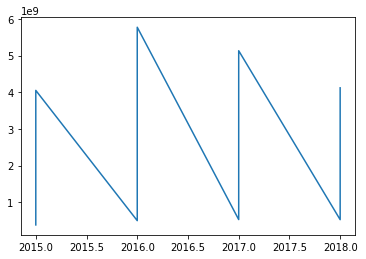

In [10]:
Allianz_mean=Allianz.loc[:,['ToplamUretim','year']]
#Allianz_mean=Allianz_mean.groupby(Allianz_mean['year']).mean()
#Allianz_mean.columns=year.astype(int)
print(Allianz_mean['year'])
x=Allianz_mean['year']
y=Allianz_mean['ToplamUretim']
plt.plot(x,y)

In [13]:
filtered_result2['ToplamUretimNew']=filtered_result2['ToplamUretim'].astype(float)
print(filtered_result2)

                                               Sirket  SirketKodu  ToplamUretim  PazarPayi      Dates  year  ToplamUretimNew
SirketKodu                                                                                                                  
1001.0     0   Ace European Group Ltd. Türkiye Şubesi      1001.0  5.558404e+06   0.001817 2015-01-01  2015     5.558404e+06
           1   Ace European Group Ltd. Türkiye Şubesi      1001.0  1.014411e+07   0.001895 2015-02-01  2015     1.014411e+07
           2   Ace European Group Ltd. Türkiye Şubesi      1001.0  1.794620e+07   0.002268 2015-03-01  2015     1.794620e+07
           3   Ace European Group Ltd. Türkiye Şubesi      1001.0  2.839670e+07   0.002725 2015-04-01  2015     2.839670e+07
           4   Ace European Group Ltd. Türkiye Şubesi      1001.0  3.588368e+07   0.002808 2015-05-01  2015     3.588368e+07
           5   Ace European Group Ltd. Türkiye Şubesi      1001.0  4.283985e+07   0.002811 2015-06-01  2015     4.283985e+07


      PazarPayi
year           
2015   0.015625
2016   0.015645
2017   0.016540
2018   0.016453
      PazarPayi
year           
2015   0.122269
2016   0.135181
2017   0.111192
2018   0.102855
      PazarPayi
year           
2015   0.057240
2016   0.047389
2017   0.052467
2018   0.061109
      PazarPayi
year           
2015   0.112771
2016   0.109307
2017   0.096567
2018   0.099311
      PazarPayi
year           
2015   0.099085
2016   0.094365
2017   0.062378
2018   0.057095
      PazarPayi
year           
2015   0.028445
2016   0.050044
2017   0.045561
2018   0.042779


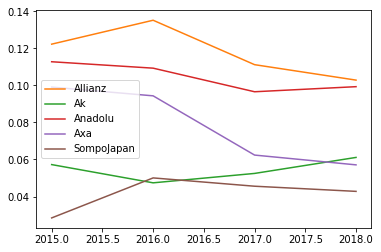

In [6]:

#ALL COMPANIES MARKET SHARE MEAN
All_companies=filtered_result2.loc[:,['PazarPayi','year']]
All_companies=All_companies.groupby(All_companies['year']).mean()
print(All_companies)

#ALLIANZ MARKET SHARE Mean
Allianz_mean=Allianz.loc[:,['PazarPayi','year']]
Allianz_mean=Allianz_mean.groupby(Allianz_mean['year']).mean()
print(Allianz_mean)
#print(Allianz)


#AK SIGORTA MARKET SHARE MEAN

Ak_mean=Ak.loc[:,['PazarPayi','year']]
Ak_mean=Ak_mean.groupby(Ak_mean['year']).mean()
print(Ak_mean)


#ANADOLU SIGORTA MARKET SHARE MEAN

Anadolu_mean=Anadolu.loc[:,['PazarPayi','year']]
Anadolu_mean=Anadolu_mean.groupby(Anadolu_mean['year']).mean()
print(Anadolu_mean)

#AXA SIGORTA MARKET SHARE MEAN

Axa_mean=Axa.loc[:,['PazarPayi','year']]
Axa_mean=Axa_mean.groupby(Axa_mean['year']).mean()
print(Axa_mean)

#SOMPOJAPAN SIGORTA MARKET SHARE MEAN

SompoJapan_mean=SompoJapan.loc[:,['PazarPayi','year']]
SompoJapan_mean=SompoJapan_mean.groupby(SompoJapan_mean['year']).mean()
print(SompoJapan_mean)


#plt.scatter(All_companies,Allianz_mean)
#Allianz_mean.columns = year.astype(int)

x = All_companies.index
y1 = All_companies['PazarPayi']
y2 = Allianz_mean['PazarPayi']
y3 =Ak_mean['PazarPayi']
y4= Anadolu_mean['PazarPayi']
y5=Axa_mean['PazarPayi']
y6=SompoJapan_mean['PazarPayi']

#plt.plot(x,y1)
plt.plot(x,y2,'C1', label="Allianz")
plt.plot(x,y3,'C2', label='Ak')
plt.plot(x,y4,'C3', label='Anadolu')
plt.plot(x,y5, 'C4', label='Axa')
plt.plot(x,y6, 'C5', label='SompoJapan')
plt.legend()
plt.show()

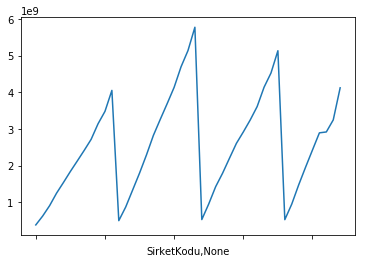

In [2]:
Allianz['ToplamUretim'].plot()
plt.show()

In [2]:
filtered_result2['TotalGDP']=[2044465, 2338647, 2608525, 3106536, 1]
print(filtered_result2)

NameError: name 'filtered_result2' is not defined

In [1]:
All_companies=filtered_result2.loc[:,['ToplamUretim','year']]
All_companies=All_companies.groupby(All_companies['year']).mean()
print(All_companies)

NameError: name 'filtered_result2' is not defined

In [5]:
#ALL COMPANIES TOTAL PREMIUM  SUM
All_companiesSum=filtered_result2.loc[:,['ToplamUretim','year']]
All_companiesSum=All_companiesSum.groupby(All_companiesSum['year']).sum()
All_companiesSum['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 1], index=All_companiesSum.index)
All_companiesSum['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=All_companiesSum.index)
All_companiesSum['AllCompCumPremium']=(100*(All_companiesSum['ToplamUretim']-All_companiesSum['ToplamUretim'].shift(1)))/All_companiesSum['ToplamUretim']
print(All_companiesSum)


      ToplamUretim  TotalGDP  TotalCPI  AllCompCumPremium
year                                                     
2014  1.692928e+11   2044465   242.020                NaN
2015  1.968533e+11   2338647   260.585          14.000496
2016  2.613151e+11   2608525   280.860          24.668255
2017  2.988593e+11   3106536   312.150          12.562492
2018  3.428507e+11         1   363.125          12.831061


In [6]:
#ALL COMPANIES TOTAL PREMIUM  SUM
All_companiesSum=filtered_result2.loc[:,['ToplamUretim','year']]
All_companiesSum=All_companiesSum.groupby(All_companiesSum['year']).sum()
All_companiesSum['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 1], index=All_companiesSum.index)
All_companiesSum['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=All_companiesSum.index)
All_companiesSum['AllCompCumPremiumRatio']=(100*(All_companiesSum['ToplamUretim']-All_companiesSum['ToplamUretim'].shift(1)))/All_companiesSum['ToplamUretim']
All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
print(All_companiesSum)

      ToplamUretim  TotalGDP  TotalCPI  AllCompCumPremiumRatio      GdpRatio
year                                                                        
2014  1.692928e+11   2044465   242.020                     NaN           NaN
2015  1.968533e+11   2338647   260.585               14.000496  1.257915e+01
2016  2.613151e+11   2608525   280.860               24.668255  1.034600e+01
2017  2.988593e+11   3106536   312.150               12.562492  1.603107e+01
2018  3.428507e+11         1   363.125               12.831061 -3.106535e+08


In [7]:
All_companiesSum.iloc[:, -1]

year
2014           NaN
2015   -100.000000
2016   -100.000000
2017   -100.000000
2018   -100.090609
Name: CAGR, dtype: float64

In [8]:
All_companiesSum.iloc[:, -1]

year
2014           NaN
2015   -100.000000
2016   -100.000000
2017   -100.000000
2018   -100.090609
Name: CAGR, dtype: float64

In [13]:
CAGR=[]
for i in range(1,5):
    #All_companiesSum['CAGR']= pd.Series([(100*(All_companiesSum['ToplamUretim']-All_companiesSum['ToplamUretim'].shift(i)))/All_companiesSum['ToplamUretim']], index=All_companiesSum.index)
    CAGR.append((100*(All_companiesSum.iloc[i,0]-All_companiesSum.iloc[(i-1),0])/All_companiesSum[i,0]))
print(CAGR)

KeyError: (1, 0)

In [4]:
print(All_companiesSum.iloc[i:1])

Empty DataFrame
Columns: [ToplamUretim, TotalGDP, TotalCPI, AllCompCumPremiumRatio, GdpRatio]
Index: []


In [5]:
print(All_companiesSum)

      ToplamUretim  TotalGDP  TotalCPI  AllCompCumPremiumRatio      GdpRatio
year                                                                        
2014  1.692928e+11   2044465   242.020                     NaN           NaN
2015  1.968533e+11   2338647   260.585               14.000496  1.257915e+01
2016  2.613151e+11   2608525   280.860               24.668255  1.034600e+01
2017  2.988593e+11   3106536   312.150               12.562492  1.603107e+01
2018  3.428507e+11         1   363.125               12.831061 -3.106535e+08


In [6]:
print(All_companiesSum.iloc[1:1])

Empty DataFrame
Columns: [ToplamUretim, TotalGDP, TotalCPI, AllCompCumPremiumRatio, GdpRatio]
Index: []


In [7]:
print(All_companiesSum.iloc[2:1])

Empty DataFrame
Columns: [ToplamUretim, TotalGDP, TotalCPI, AllCompCumPremiumRatio, GdpRatio]
Index: []


In [8]:
print(All_companiesSum.iloc[2:2])

Empty DataFrame
Columns: [ToplamUretim, TotalGDP, TotalCPI, AllCompCumPremiumRatio, GdpRatio]
Index: []


In [9]:
print(All_companiesSum.loc[1:1])

Empty DataFrame
Columns: [ToplamUretim, TotalGDP, TotalCPI, AllCompCumPremiumRatio, GdpRatio]
Index: []


In [10]:
print(All_companiesSum.loc[2:2])

Empty DataFrame
Columns: [ToplamUretim, TotalGDP, TotalCPI, AllCompCumPremiumRatio, GdpRatio]
Index: []


In [11]:
print(All_companiesSum.iloc[1,1])

2338647


In [14]:
All_companiesSum.iloc[i,0]


196853258695.9325

In [15]:
All_companiesSum.iloc[0,0]

169292826639.8636

In [16]:
All_companiesSum.iloc[1,0]

196853258695.9325

In [17]:
for i in range(1,5):
    #All_companiesSum['CAGR']= pd.Series([(100*(All_companiesSum['ToplamUretim']-All_companiesSum['ToplamUretim'].shift(i)))/All_companiesSum['ToplamUretim']], index=All_companiesSum.index)
    print((100*(All_companiesSum.iloc[i,0]-All_companiesSum.iloc[(i-1),0])/All_companiesSum[i,0]))

KeyError: (1, 0)

In [20]:
for i in range(1,5):
    #All_companiesSum['CAGR']= pd.Series([(100*(All_companiesSum['ToplamUretim']-All_companiesSum['ToplamUretim'].shift(i)))/All_companiesSum['ToplamUretim']], index=All_companiesSum.index)
    print((100*(All_companiesSum.iloc[i,0]-All_companiesSum.iloc[(i-1),0]))/(All_companiesSum.iloc[i,0]))

14.000495718813507
24.66825473649802
12.56249242419682
12.831061454467592


In [1]:
#HOLT WINTER'S METHOD ALLIANZ MARKET SHARE

ets_stl = ExponentialSmoothing((Allianz.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)

Allianz.iloc[:, 3].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='MarketShare pred')
plt.show()

NameError: name 'ExponentialSmoothing' is not defined